In [ ]:
from google.colab import drive
drive.mount("/content/gdrive", force_remount=True)

Mounted at /content/gdrive


In [ ]:
# test connetion
!ls '/content/gdrive/My Drive'

'Colab Notebooks'				   'to clean'
 Detection					    Untitled0.ipynb
 ML.ipynb					   'Untitled document (1).gdoc'
'Netlist generator'				   'Untitled document (2).gdoc'
 resume.pdf					   'Untitled document.gdoc'
 shared						   'Untitled folder'
'STATE OF KUWAIT CIVIL ID CARD_241130_224444.pdf'   Untitled.pdf


In [ ]:
!pip install ultralytics

In [ ]:
# test connetion
!ls '/content/gdrive/My Drive/Netlist generator'
!ls '/content/gdrive/My Drive/Netlist generator/Testing'
!ls '/content/gdrive/My Drive/Netlist generator/Training'
!ls '/content/gdrive/My Drive/Netlist generator/Testing/Model testing'

'Current trained model'   Testing   Training
'Model testing'  'Netlist generator algorithm testing'
 config.yaml   data  'Train object keypoint detection model.ipynb'
'Model Testing.ipynb'  'Testing images'


**Test all images in model testing images folder**

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.

image 1/1 /content/gdrive/My Drive/Netlist generator/Testing/Model testing/Testing images/BGR_test_0002.jpg: 352x640 1 Capacitor, 5 Transistor_MOSFETs, 1 Voltage_src, 1284.5ms
Speed: 18.3ms preprocess, 1284.5ms inference, 38.3ms postprocess per image at shape (1, 3, 352, 640)

image 1/1 /content/gdrive/My Drive/Netlist generator/Testing/Model testing/Testing images/circuit_test_0005.jpg: 640x608 2 Resistors, 1 Transistor_BJT, 1 GND, 2419.5ms
Speed: 5.6ms preprocess, 2419.5ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 608)

image 1/1 /content/gdrive/My Drive/Netlist generator/Testing/Model testing/Testing images/circuit_test_0008.jpg: 640x352 1 Resistor, 1 Inducto

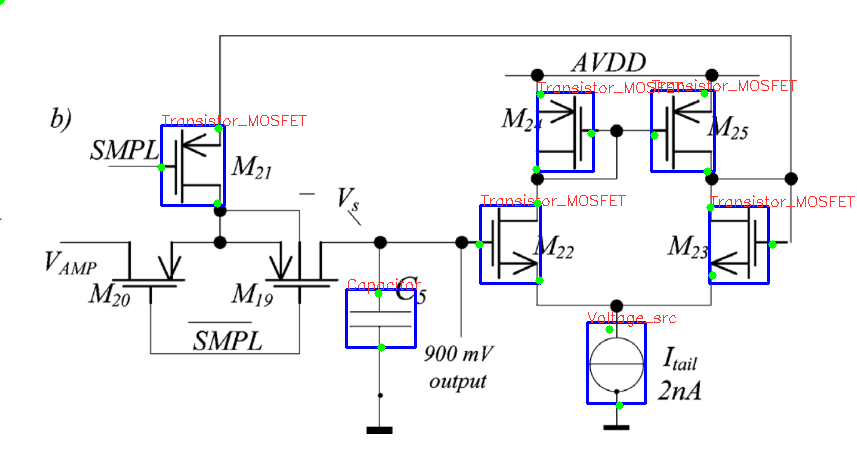

Displaying image: circuit_test_0005.jpg


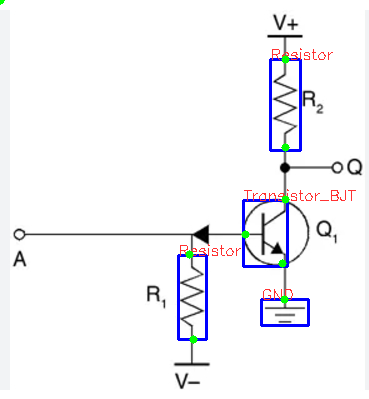

Displaying image: circuit_test_0008.jpg


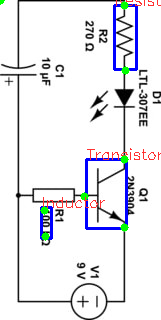

Displaying image: simple_0001.jpg


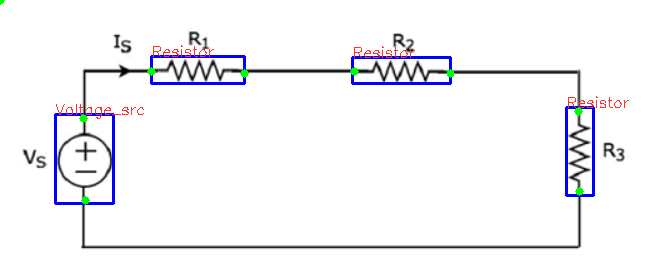

Displaying image: BGR_test_0001.jpg


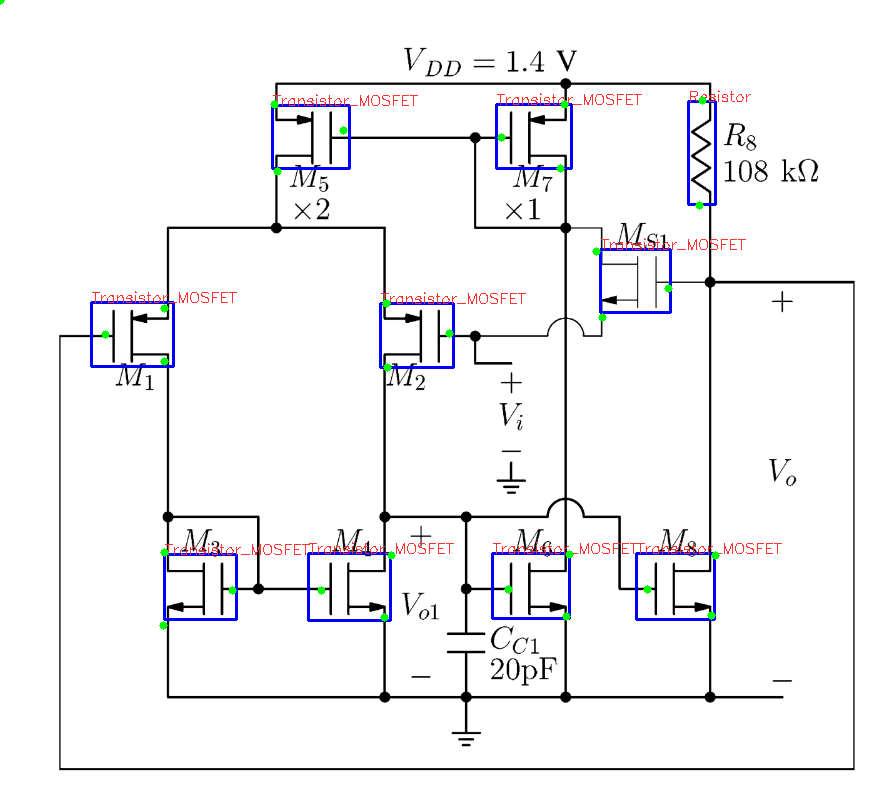

Displaying image: circuit_test_0007.jpg


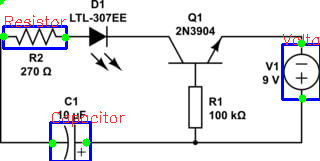

Displaying image: simple_0003.jpg


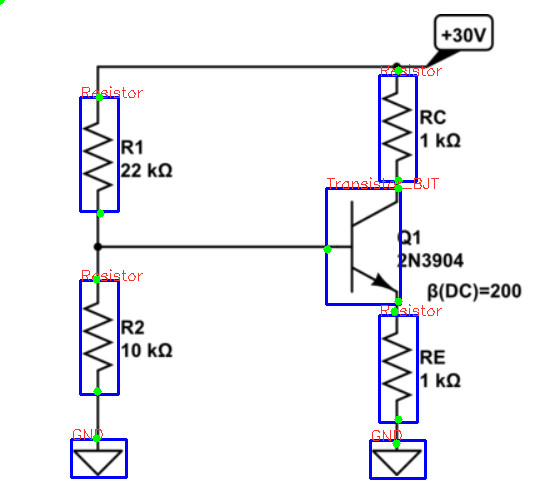

Displaying image: circuit_test_0001.jpg


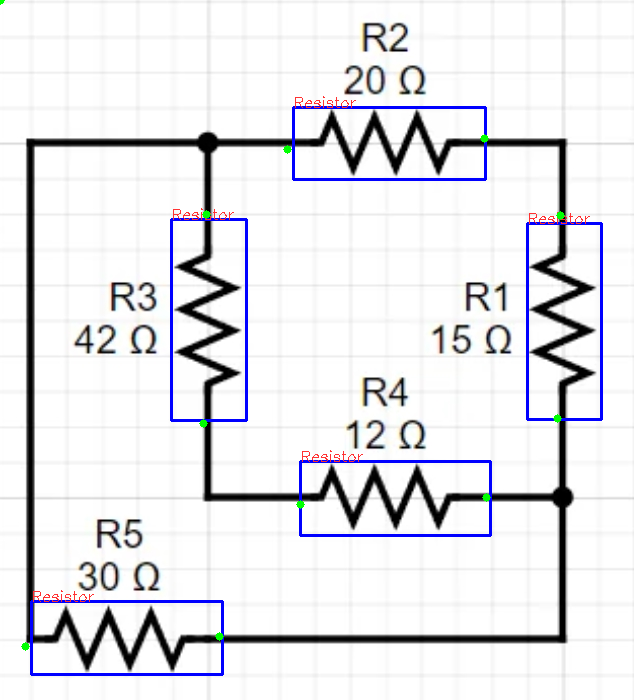

Displaying image: circuit_0056.jpg


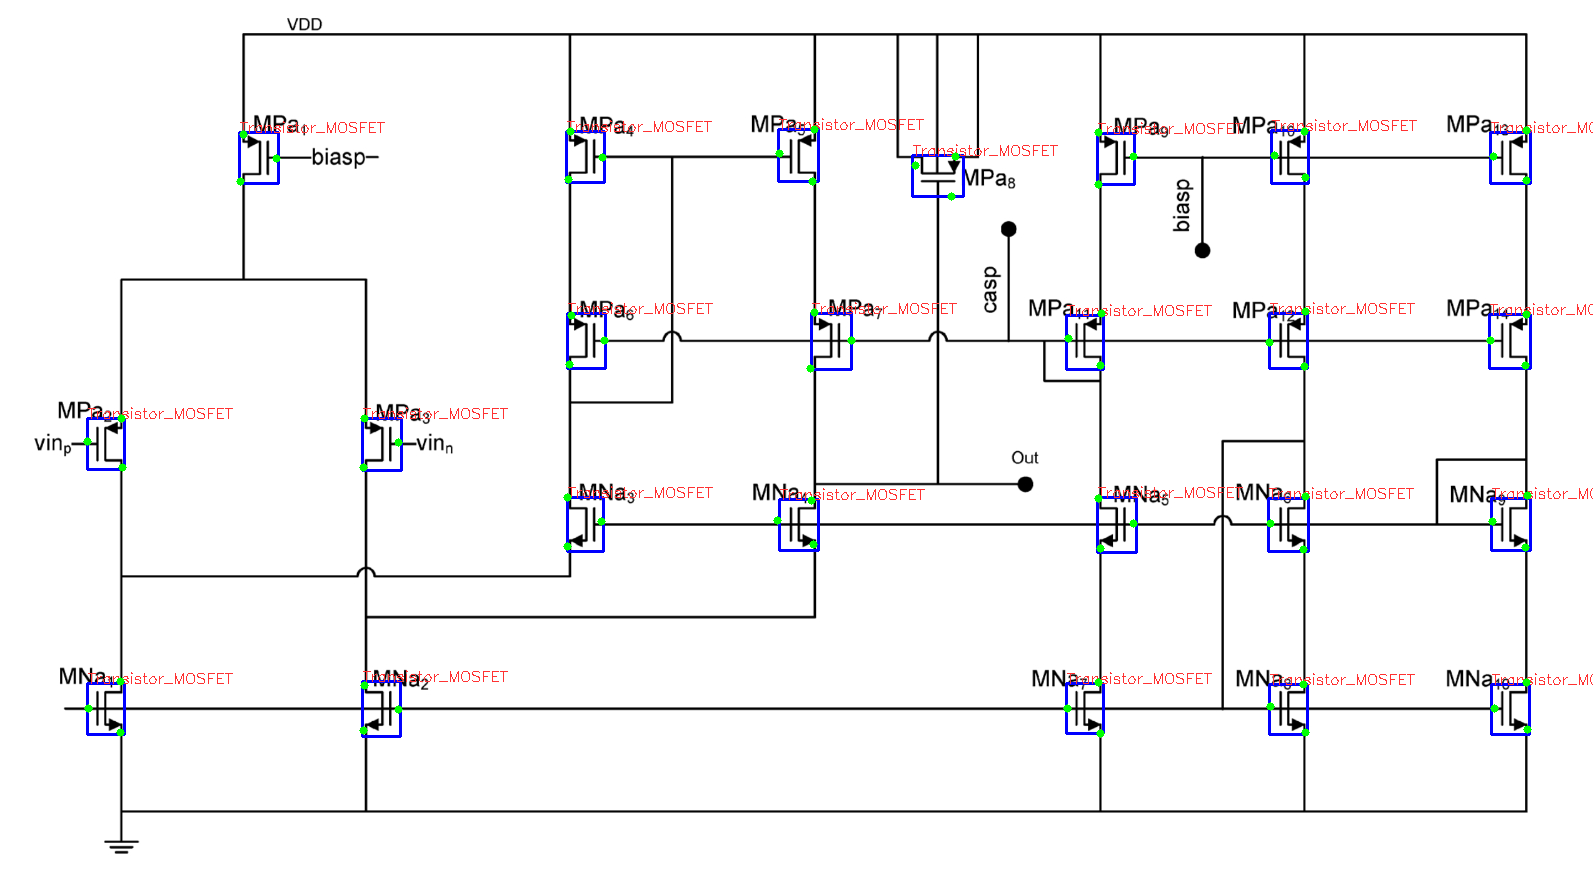

Displaying image: simple_0002.jpg


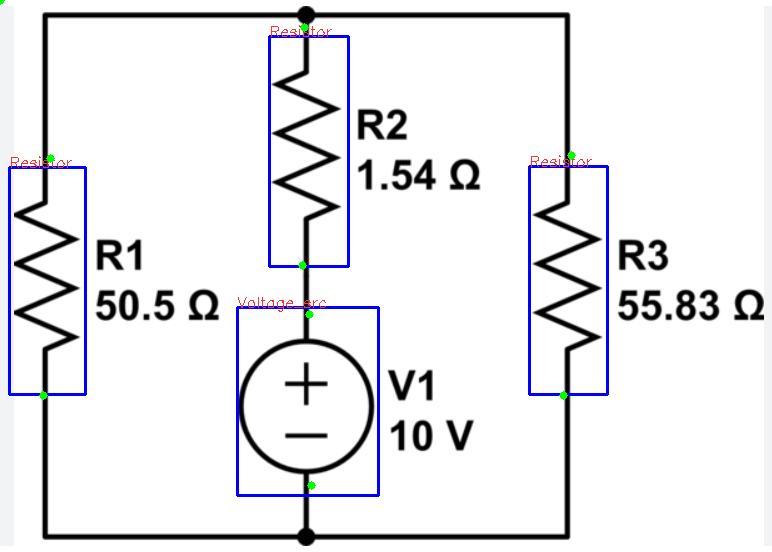

Displaying image: circuit_test_0004.jpg


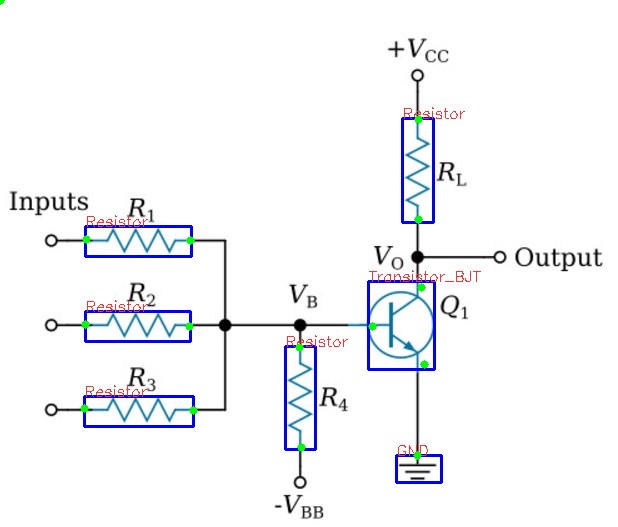

Displaying image: circuit_test_0006.jpg


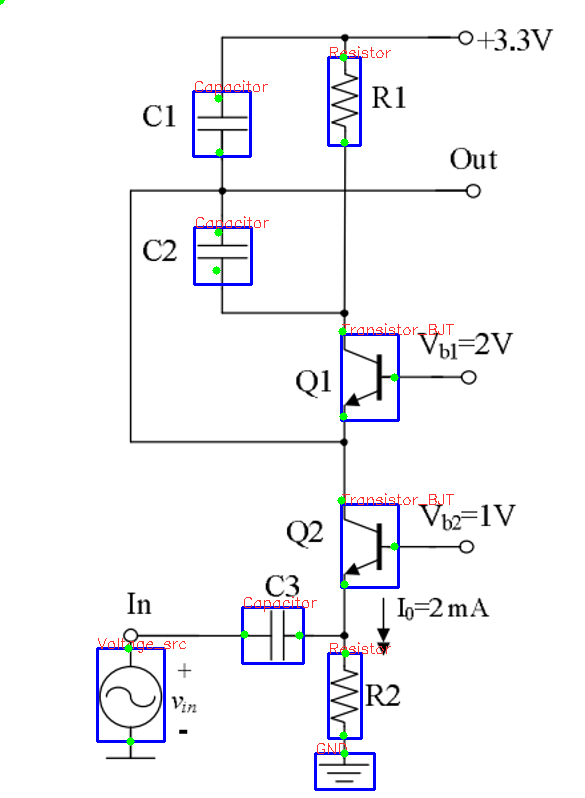

Displaying image: circuit_test_0002.jpg


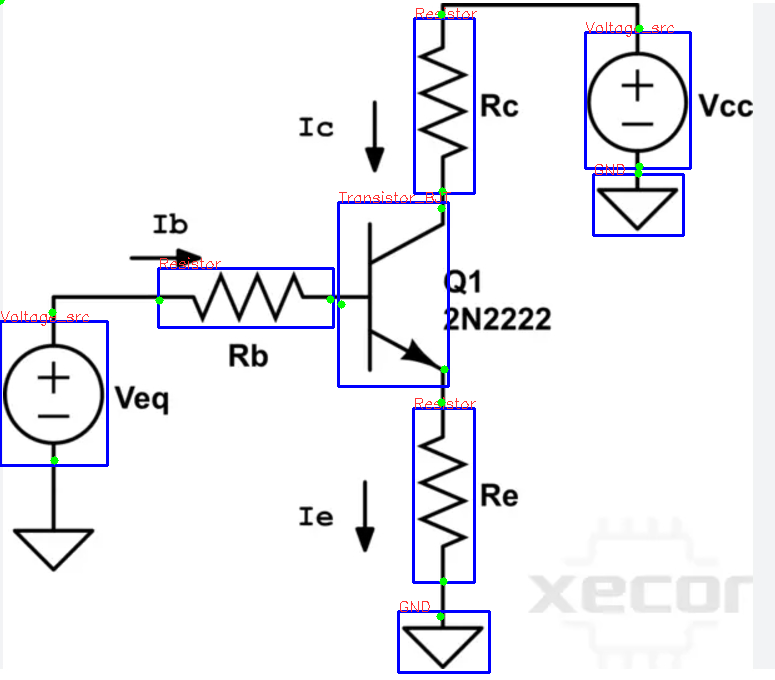

Displaying image: GND_test.jpg


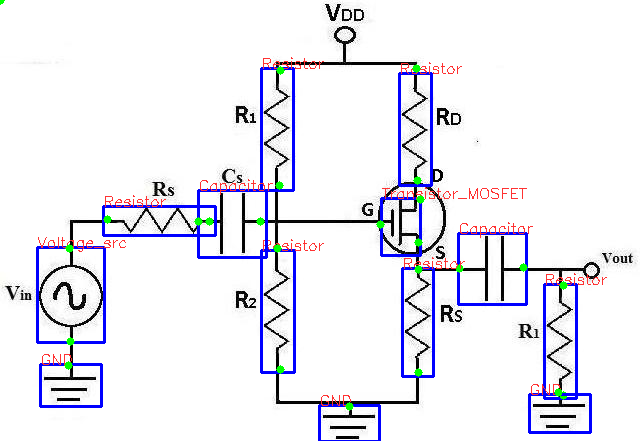

In [ ]:
import os
from ultralytics import YOLO
import cv2
from google.colab.patches import cv2_imshow

# Paths for model and image folder
model_path = '/content/gdrive/My Drive/Netlist generator/Current trained model/pose/train/weights/last.pt'
image_folder = '/content/gdrive/My Drive/Netlist generator/Testing/Model testing/Test images/'

# Load YOLO model
model = YOLO(model_path)

# Get a list of all image files in the folder
image_files = [f for f in os.listdir(image_folder) if f.lower().endswith(('.jpg', '.jpeg', '.png'))]

# List to store processed images
processed_images = []

# Loop through each image file
for image_file in image_files:
    image_path = os.path.join(image_folder, image_file)

    # Load image
    img = cv2.imread(image_path)

    # Run inference
    results = model(image_path)[0]

    # Process each result
    for result in results:
        # Handle multiple detections properly
        for cls, keypoints, bbox in zip(result.boxes.cls.cpu().numpy(),
                                         result.keypoints.xy.cpu().numpy(),
                                         result.boxes.xyxy.cpu().numpy()):
            class_idx = int(cls)  # Convert single class index to int
            object_name = results.names[class_idx]  # Get the class name using the class index

            # Extract bounding box coordinates
            x_min, y_min, x_max, y_max = map(int, bbox)

            # Draw a rectangle (square) around the detected object
            cv2.rectangle(img, (x_min, y_min), (x_max, y_max), (255, 0, 0), 2)

            # Display object name above the bounding box
            cv2.putText(img, object_name, (x_min, y_min),
                        cv2.FONT_HERSHEY_SIMPLEX, 0.5, (50, 50, 255), 1)

            for keypoint in keypoints:
              x, y = int(keypoint[0]), int(keypoint[1])  # Explicitly get x, y coordinates
              cv2.circle(img, (x, y), radius=4, color=(0, 255, 0), thickness=-1)

    # Append processed image to list
    processed_images.append((image_file, img))

# Display all processed images
for file_name, processed_img in processed_images:
    print(f"Displaying image: {file_name}")
    cv2_imshow(processed_img)

**Test one specific image in model testing images folder**


image 1/1 /content/gdrive/My Drive/Netlist generator/Testing/Model testing/Testing images/GND_test.jpg: 448x640 6 Resistors, 2 Capacitors, 1 Transistor_MOSFET, 1 Voltage_src, 3 GNDs, 1082.5ms
Speed: 3.0ms preprocess, 1082.5ms inference, 1.4ms postprocess per image at shape (1, 3, 448, 640)


<ipython-input-10-b8ff752512a8>:23: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  class_idx = int(result.boxes.cls.cpu().numpy())  # Convert tensor to numpy, then to int


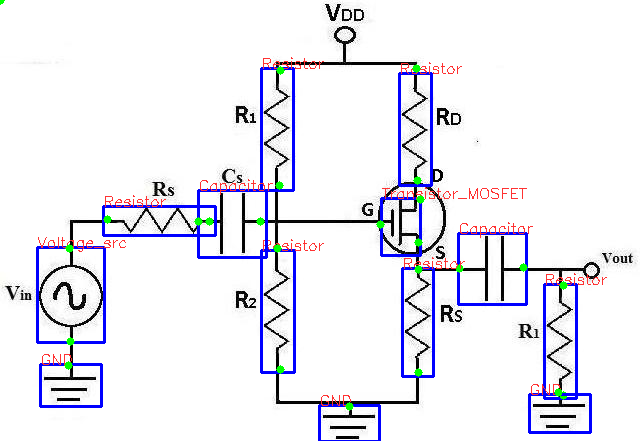

In [ ]:
from ultralytics import YOLO
import cv2
from google.colab.patches import cv2_imshow

# Paths for model and image
test_image_name = 'circuit_test_0002.jpg'
model_path = '/content/gdrive/My Drive/Netlist generator/Current trained model/pose/train/weights/last.pt'
image_folder = '/content/gdrive/My Drive/Netlist generator/Testing/Model testing/Test images/' + test_image_name

# Load image
img = cv2.imread(image_path)

# Load YOLO model
model = YOLO(model_path)

# Run inference
results = model(image_path)[0]

# Process each result
for result in results:
    # Remove extra dimension to get keypoints in the format [N, 2]
    keypoints = result.keypoints.xy.cpu().numpy()[0]  # Move tensor to CPU before converting to NumPy
    class_idx = int(result.boxes.cls.cpu().numpy())  # Convert tensor to numpy, then to int
    object_name = results.names[class_idx]    # Get the class name using the class index

    # Draw bounding box around the object
    bbox = result.boxes.xyxy.cpu().numpy()[0]  # Move tensor to CPU before converting to NumPy
    x_min, y_min, x_max, y_max = map(int, bbox)  # Extract bounding box coordinates

    # Draw a rectangle (square) around the detected object
    cv2.rectangle(img, (x_min, y_min), (x_max, y_max), (255, 0, 0), 2)

    # Display object name above the bounding box
    cv2.putText(img, object_name, (x_min , y_min ),
                cv2.FONT_HERSHEY_SIMPLEX, 0.5, (50, 50, 255), 1)
    # Draw keypoints on image
    for keypoint in keypoints:
      x, y = int(keypoint[0]), int(keypoint[1])  # Explicitly get x, y coordinates
      cv2.circle(img, (x, y), radius=4, color=(0, 255, 0), thickness=-1)

# Display image with keypoints and bounding box
cv2_imshow(img)